# Projet Final - Classification binaire

- **Description du projet :**

> Ce projet consiste à prédire le parti politique gagnant des élections présidentielles de 2020 aux États-Unis à partir des données socio-démographiques

![US](https://prod-media-eng.dhakatribune.com/uploads/2020/06/bigstock-illustration-of-election-357906857-1592827070539.jpg)

***Dans cette partie d'exploration de données, nous allons nous mettre à l'aise avec le `DataSet`, comprendre au maiximum les différentes variables, tirer des conclusions nécessaires afin de définir une stratégie de modélisation qui nous permettra d'atteindre l'objectif que l'on s'était fixé.***

*Donc, il s'agit de ce qu'il faut faire avec les données pour atteindre l'objectif fixé.*

## Table de matières
<ol>
    <li><a href="#def">Définition du problème</a></li>
    <li><a href="#import_data">Importation et acquisition de données</a>
        <ol>
            <li><a href="#import">Importation des librairies</a></li>
            <li><a href="#get">Chargement de données</a></li>
        </ol>
    </li>
    <li><a href="#a1">Analyse de la forme</a>
        <ol>
            <li><a href="#target">Répartition de la target</a></li>
            <li><a href="#data_type">Différents types de variables</a></li>
            <li><a href="#doublon">Contrôle des doublons</a></li>
            <li><a href="#na_val">Identification de valeurs manquantes</a></li>
            <li><a href="#outlier">Identification des valeurs aberrantes</a></li>
            <li><a href="#stat">Agrégats et Statistiques classiques</a></li>
            <li><a href="#data_manage">Gestion de données</a></li>
                <ol>
                    <li><a href="#outlier_prepro">Traitement de valeurs aberrantes</a></li>
                </ol>
        </ol>
    </li>
    <li><a href="#a2">Analyse de fond</a></li>
        <ol>
            <li><a href="#a3">Analyse Univariée</a></li>
            <li><a href="#a4">Analyse Bivariée</a></li>
                <ol>
                    <li><a href="#num_target">Relation variables numériques et target</a></li>
                    <li><a href="#vars">Relation entre les variables explicatives</a></li>
                </ol>
        </ol>
    <li><a href="#end">Conclusion</a></li>
</ol>

<a id="def"></a>
## 1. Définition du problème

- L'objectif est de *`prédire` le parti politique victorieux de chaque état U.S aux élections de 2020 en fonction d'un ensemble de données socio-démographiques et d'évaluer la performance du `modèle`.*

- Nous avons à notre disposition plusieurs jeux de données, notamment ceux des résulatats entre 2008 et 2016 et également ceux de 2020 mais les prédictions se feront uniquement avec le `Dataset` des élections de `2020`.

- Nous partirons de rien et essayer de construire progressivement une solution atteignant une très bonne performance.

- Il s'agit bien d'un problème de *`Machine Learning Supervisé`* et plus précisement d'une tâche de *`classification binaire`* dont l'objectif est de prédire une variable `qualitative discrète` : *`Parti Républicain (1)`* ou *`Parti Démocrate (0)`.*

- Le `modèle` sera évalué en utilisant la métrique de *`Score F1`* qui est le rapport entre deux métriques *`Precision`* et  *`Recall`* mais nous utiliserons également d'autres `métriques` comme le `Recall`, la `Precision` et l'`accuracy` pour évaluer le modèle afin comparer leurs performances.

<a id="import_data"></a>
## 2. Importation des packages nécessaires et acquisition de données

***Dans cette partie nous allons importer les `librairies` qui nous serviront tout au long de notre analyse pour ensuite charger les données sur lesquelles porteront nos analyses***

<a id="import"></a>
## 2.1 Importation de librairies

In [1]:
# Importer les packages nécessaires au travail
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as ss
import seaborn as sns
import plotly.express as px
import missingno as msno

In [2]:
# Afficher toutes les colnnes de nos DataFrames
pd.set_option('display.max_columns', None)


<a id="get"></a>
## 2.2 Chargement des données

In [3]:
# Charger les données
df_election = pd.read_csv("elections.csv")

In [4]:
# Afficher la répartition distributive de la target
df_election["win"].value_counts(normalize=True)

1    0.827387
0    0.172613
Name: win, dtype: float64

In [5]:
# Afficher la taille de nos données
print(f"La base fait {df_election.shape[0]} lignes et {df_election.shape[1]} colonnes\n")
# Afficher les 5 premières lignes des données
df_election.head()

La base fait 3111 lignes et 354 colonnes



state_name  fips_code     county_name  votes_gop  votes_dem  total_votes  \
0    Alabama       1001  Autauga County      19838       7503        27770   
1    Alabama       1003  Baldwin County      83544      24578       109679   
2    Alabama       1005  Barbour County       5622       4816        10518   
3    Alabama       1007     Bibb County       7525       1986         9595   
4    Alabama       1009   Blount County      24711       2640        27588   

    diff   per_gop   per_dem  per_point_diff  win          county  total_2008  \
0  12335  0.714368  0.270184        0.444184    1  Autauga County       23641   
1  58966  0.761714  0.224090        0.537623    1  Baldwin County       81413   
2    806  0.534512  0.457882        0.076631    1  Barbour County       11630   
3   5539  0.784263  0.206983        0.577280    1     Bibb County        8644   
4  22071  0.895716  0.095694        0.800022    1   Blount County       24267   

   dem_2008  gop_2008  oth_2008  total_2012  dem_2012  gop_2012  oth_2012  \
0      6093     17403       145       23909      6354     17366       189   
1     19386     61271       756       84988     18329     65772       887   
2      5697      5866        67       11459      5873      5539        47   
3      2299      6262        83        8391      2200      6131        60   
4      3522     20389       356       23980      2961     20741       278   

   total_2016  dem_2016  gop_2016  oth_2016 State_x       Area_Name  \
0       24661      5908     18110       643      AL  Autauga County   
1       94090     18409     72780      2901      AL  Baldwin County   
2       10390      4848      5431       111      AL  Barbour County   
3        8748      1874      6733       141      AL     Bibb County   
4       25384      2150     22808       426      AL   Blount County   

   Rural-urban_Continuum Code_2003  Rural-urban_Continuum Code_2013  \
0                              2.0                              2.0   
1                              4.0                              3.0   
2                              6.0                              6.0   
3                              1.0                              1.0   
4                              1.0                              1.0   

   Urban_Influence_Code_2003_x  Urban_Influence_Code_2013_x  \
0                          2.0                          2.0   
1                          5.0                          2.0   
2                          6.0                          6.0   
3                          1.0                          1.0   
4                          1.0                          1.0   

   Economic_typology_2015  CENSUS_2010_POP  ESTIMATES_BASE_2010  \
0                     0.0            54571                54597   
1                     5.0           182265               182265   
2                     3.0            27457                27455   
3                     0.0            22915                22915   
4                     0.0            57322                57322   

   POP_ESTIMATE_2010  POP_ESTIMATE_2011  POP_ESTIMATE_2012  POP_ESTIMATE_2013  \
0              54773              55227              54954              54727   
1             183112             186558             190145             194885   
2              27327              27341              27169              26937   
3              22870              22745              22667              22521   
4              57376              57560              57580              57619   

   POP_ESTIMATE_2014  POP_ESTIMATE_2015  POP_ESTIMATE_2016  POP_ESTIMATE_2017  \
0              54893              54864              55243              55390   
1             199183             202939             207601             212521   
2              26755              26283              25806              25157   
3              22553              22566              22586              22550   
4              57526              57526              57

- **Sélection des variables jugées pertinentes vue métier**

In [6]:
col_to_keep = ["state_name", "county", "Economic_typology_2015", "POP_ESTIMATE_2019",
               "N_POP_CHG_2019", "Deaths_2019", "NATURAL_INC_2019", "PCTPOVALL_2019",
               "GQ_ESTIMATES_2019", "2013 Urban Influence Code", "Unemployment_rate_2019",
               "Med_HH_Income_Percent_of_State_Total_2019", "win"]

In [7]:
# Sélectionner les variables pertinentes sur lesquelles travailler
df_election = df_election[col_to_keep].copy()

# Vérifier les modifications en affichant la base et les 5 premières lignes
print(f"A présent la base fait {df_election.shape[0]} et {df_election.shape[1]} colonnes\n")
df_election.head()

A présent la base fait 3111 et 13 colonnes



state_name          county  Economic_typology_2015  POP_ESTIMATE_2019  \
0    Alabama  Autauga County                     0.0              55869   
1    Alabama  Baldwin County                     5.0             223234   
2    Alabama  Barbour County                     3.0              24686   
3    Alabama     Bibb County                     0.0              22394   
4    Alabama   Blount County                     0.0              57826   

   N_POP_CHG_2019  Deaths_2019  NATURAL_INC_2019  PCTPOVALL_2019  \
0           336.0        541.0              83.0            12.1   
1          5379.0       2326.0             -22.0            10.1   
2          -186.0        312.0             -56.0            27.1   
3            27.0        252.0             -12.0            20.3   
4            55.0        657.0              -6.0            16.3   

   GQ_ESTIMATES_2019  2013 Urban Influence Code  Unemployment_rate_2019  \
0              455.0                        2.0                     2.7   
1             2170.0                        2.0                     2.7   
2             2812.0                        6.0                     3.8   
3             2148.0                        1.0                     3.1   
4              489.0                        1.0                     2.7   

   Med_HH_Income_Percent_of_State_Total_2019  win  
0                                 112.481888    1  
1                                 115.645828    1  
2                                  69.482918    1  
3                                  92.557610    1  
4                                 102.184624    1

In [8]:
# Renommer la colonne (2013 Urban Influence Code)
df_election.rename(columns={"2013 Urban Influence Code" : "Urban_Inf_Code_2013"}, 
                   inplace=True)

<a id="a1"></a>
## 3. Analyse de la forme (contrôle et gestion de données)

Cette analyse permet l'identification de la target ainsi que sa distribution, de savoir les types de nos variables, de contrôler la présence ou non des doublons, d'identifier les valeurs manquantes, de voir les valeurs aberrantes potentielles, de déterminer les statistiques de base dites classiques.

<a id="target"></a>
## 3.1 Répartition de la target

In [9]:
# Créer le DataFrame de distribution de la target
target_distribution = (pd.DataFrame(df_election["win"].value_counts(normalize=True) 
                       * 100).reset_index()
                       .rename(columns={"index": "target", "win": "count"})
                       )

# Afficher le DataFrame de distribution créé
target_distribution


target      count
0       1  82.738669
1       0  17.261331

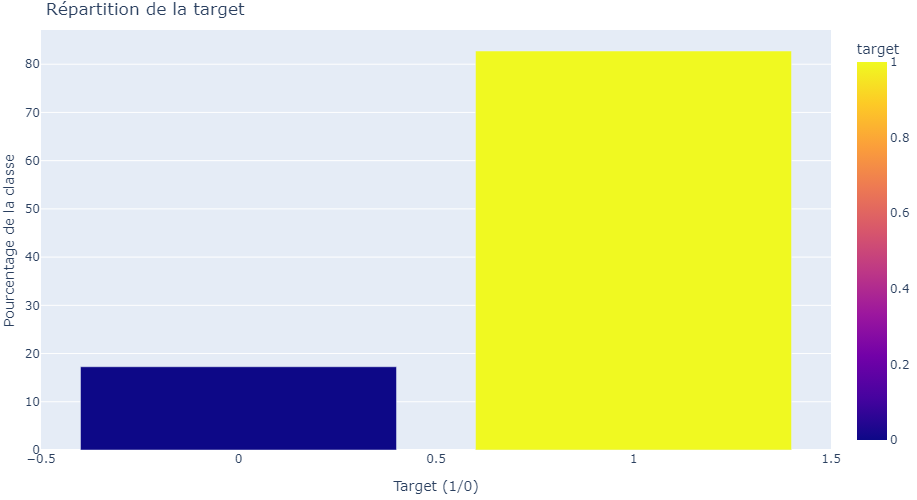

In [10]:
# Réprenseter graphiquement la distribution de notre target
fig = px.bar(data_frame=target_distribution, x="target", y="count",
             hover_data={"count": ":.2f"}, color="target"
             )  # N prendre 2 deux chiffre après la virgule

# Mettre en forme la figure
fig.update_layout(title="Répartition de la target", xaxis_title="Target (1/0)",
                  yaxis_title="Pourcentage de la classe", margin=dict(l=0, r=0, t=30, b=50),
                  width=600, height=500
                  )

# Afficher la figure
fig.show()

<a id="data_type"></a>
## 3.2 Différents types de variables

In [11]:
# Afficher les 
df_election.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3111 entries, 0 to 3110
Data columns (total 13 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   state_name                                 3111 non-null   object 
 1   county                                     3111 non-null   object 
 2   Economic_typology_2015                     3111 non-null   float64
 3   POP_ESTIMATE_2019                          3111 non-null   int64  
 4   N_POP_CHG_2019                             3111 non-null   float64
 5   Deaths_2019                                3111 non-null   float64
 6   NATURAL_INC_2019                           3111 non-null   float64
 7   PCTPOVALL_2019                             3111 non-null   float64
 8   GQ_ESTIMATES_2019                          3111 non-null   float64
 9   Urban_Inf_Code_2013                        3111 non-null   float64
 10  Unemployment_rate_2019  

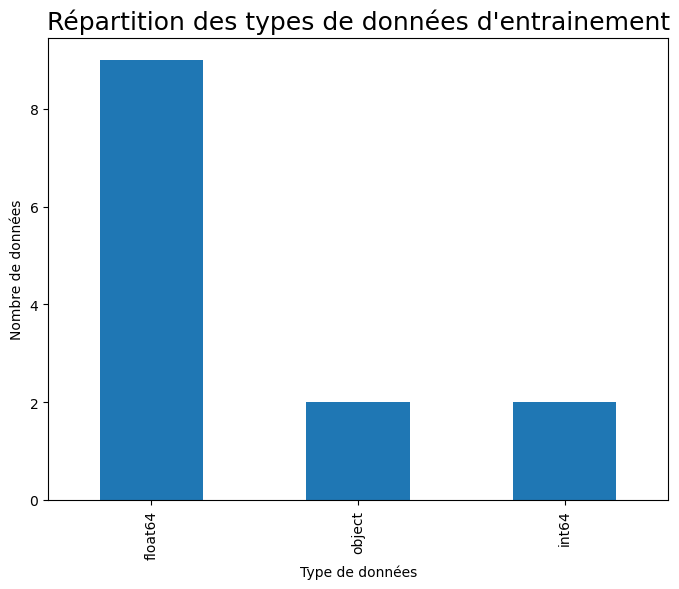

In [12]:
# Visualiser les types de variables
df_election.dtypes.value_counts().plot(kind="bar", figsize=(8, 6))
# Titrer la figure
plt.title("Répartition des types de données d'entrainement", fontsize=18)
# Labéliser l'axe des x
plt.xlabel("Type de données")
# Labéliser l'axe des y
plt.ylabel("Nombre de données");

<a id="doublon"></a>
## 3.3 Contrôle des doublons

In [13]:
# Afficher le nombre de valeurs doubles dans les données
print(f"Nous avons {df_election.duplicated().sum()} doublons dans nos données")

Nous avons 0 doublons dans nos données


<a id="na_val"></a>
## 3.4 Identification des valeurs manquantes

In [14]:
# Afficher le nombre de valeurs manquantes
print(f"Nous avons au total {sum(df_election.isna().sum())} valeurs manquantes")

Nous avons au total 0 valeurs manquantes


<a id="outlier"></a>
## 3.5 Identification des `outliers` potentiels (valeurs aberrantes)

In [15]:
# Définir la fontion pour détecter les outliers dans un DataFrame
def detect_possible_outliers(df, feature):
    """
    Permet de détecter les outliers dans une colonne numérique d'un DataFrame 
    en utilisant la méthode de l'écart interquartile (IQR).
    
    Inputs :
    --------
    - df : DataFrame
    - feature : Nom de la colonne numérique (str)
    
    Outputs :
    ---------
    Renvoyer la liste des index des possibles outliers 
    ainsi que les limites basse et haute
    
    """
    
    # Calcul du 1er Quartile 
    Q1 = np.nanpercentile(df[feature], 25)
    
    # Calcul du 3ème Quartile 
    Q3 = np.nanpercentile(df[feature], 75)
    
    # Calcul de l'Inter-Quartile Range (IQR)
    IQR = Q3 - Q1
    
    # Calcul des limites, basse & haute
    outer_fence = IQR * 1.5
    lower_limit = Q1 - outer_fence
    upper_limit = Q3 + outer_fence

    # Détecter des outliers potentiels  
    mask = (df[feature] < lower_limit) | (df[feature] > upper_limit)
    
    # Stocker leurs indices
    possible_outlier_index = df[mask].index
    
    # Faire passer sous forme de liste
    outliers_index = possible_outlier_index.tolist()
    
    return sorted(outliers_index), lower_limit, upper_limit

- **Appel à la fonction pour détecter les outliers potentiels**

In [16]:
# Crér la liste des colonnes numériques
num_cols = df_election.select_dtypes(include=np.number).columns.tolist()

# Boucler sur toutes les colonnes numériques
for col in num_cols:

    # Procéder à la détection des outliers potentiels
    outliers_index, lower_limit, upper_limit = detect_possible_outliers(df_election,
                                                                        col)
    # Afficher le nombre des outliers potentiels de chaque colonne
    print(f"{col :-<50} {len(outliers_index)} valeurs aberrantes potentielles")

Economic_typology_2015---------------------------- 0 valeurs aberrantes potentielles
POP_ESTIMATE_2019--------------------------------- 429 valeurs aberrantes potentielles
N_POP_CHG_2019------------------------------------ 563 valeurs aberrantes potentielles
Deaths_2019--------------------------------------- 379 valeurs aberrantes potentielles
NATURAL_INC_2019---------------------------------- 577 valeurs aberrantes potentielles
PCTPOVALL_2019------------------------------------ 87 valeurs aberrantes potentielles
GQ_ESTIMATES_2019--------------------------------- 355 valeurs aberrantes potentielles
Urban_Inf_Code_2013------------------------------- 0 valeurs aberrantes potentielles
Unemployment_rate_2019---------------------------- 93 valeurs aberrantes potentielles
Med_HH_Income_Percent_of_State_Total_2019--------- 101 valeurs aberrantes potentielles
win----------------------------------------------- 537 valeurs aberrantes potentielles


<a id="stat"></a>
## 3.6 Détermination des agrégats et statistiques classiques

In [17]:
# Afficher les statistiques classiques de variables numérques
df_election.describe()

Economic_typology_2015  POP_ESTIMATE_2019  N_POP_CHG_2019  \
count             3111.000000       3.111000e+03     3111.000000   
mean                 1.794600       1.052696e+05      500.086789   
std                  1.814177       3.349731e+05     2978.611871   
min                  0.000000       1.690000e+02   -34799.000000   
25%                  0.000000       1.113400e+04      -97.000000   
50%                  1.000000       2.618300e+04        6.000000   
75%                  3.000000       6.874050e+04      239.000000   
max                  5.000000       1.003911e+07    83011.000000   

        Deaths_2019  NATURAL_INC_2019  PCTPOVALL_2019  GQ_ESTIMATES_2019  \
count   3111.000000       3111.000000     3111.000000        3111.000000   
mean     909.690453        305.801993       14.462424        2590.033430   
std     2485.667552       1718.481062        5.776569        6743.734361   
min        0.000000      -4729.000000        2.700000           0.000000   
25%      123.000000        -34.000000       10.400000         177.500000   
50%      285.000000          4.000000       13.400000         611.000000   
75%      707.500000         92.500000       17.500000        2252.000000   
max    68164.000000      44799.000000       47.700000      179406.000000   

       Urban_Inf_Code_2013  Unemployment_rate_2019  \
count          3111.000000             3111.000000   
mean              5.224044                3.959081   
std               3.473503                1.386699   
min               1.000000                0.700000   
25%               2.000000                3.000000   
50%               5.000000                3.700000   
75%               8.000000                4.600000   
max              12.000000               18.300000   

       Med_HH_Income_Percent_of_State_Total_2019          win  
count                                3111.000000  3111.000000  
mean                                   89.485706     0.827387  
std                                    19.860325     0.377973  
min                                    39.922520     0.000000  
25%                                    76.445744     1.000000  
50%                                    86.743492     1.000000  
75%                                    99.461399     1.000000  
max                                   234.522598     1.000000

<a id="data_manage"></a>
## 3.7 Gestion de la qualité des données

Dans cette partie il s'agit de gérer les valeurs manquantes et les valeurs aberrantes potentielles. Après cette analyse de forme, nous avons remarquez qu'il n'y avait pas de valeurs manquantes nous allons donc juste supprimer les valeurs aberrantes potentielles `otuliers`.

<a id="outlier_prepro"></a>
## 3.7.1 Traitement des valeurs aberrantes `outliers`

In [18]:
# Définir la fonction de suppression de valeurs aberrantes
def remove_outliers(df, column_name):

    """
    Cette foncion permet de supprimer les valeurs aberrantes potentilles se trouvant
    dans un DataFrame et de renvoyer un nouveau DataFrame sans valeurs aberrantes

    Inputs:

    df         : Le DataFrame avec sur lequel on souaite supprimer les valeurs aberrantes
    column_name: Le nom de la colonne qu'il faut vérifier les lignes des outliers potentiels

    Returns:

    Renvoyer le DatFrame (df) qui ne contient aucune valeur aberrante

    """

    # Calculer le 1er et le 3ème quartiles
    Q1, Q3 = df[column_name].quantile([0.25, 0.75])
    # Calculer l'écart interquartile (IQR)
    IQR = Q3 - Q1

    # Calculer les limites inférieures et supérieures
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    
    # Supprimer les lignes qui contiennent les outliers potentiels
    # Des lignes se situant entre les limites inférieures et supérieures
    df = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

    # Renvoyer le DataFrame sans valeurs aberrantes
    return df

- **Division des données en `matrice` (variables explicatives) et `vecteur` (target)**

In [19]:
# Créer la matrice explicative
X = df_election.drop(columns=["win"])
# Créer le vecteur target
y = df_election["win"]

# Crér la liste des variables numériques et catégorielles
num_cols = X.select_dtypes(include=np.number).columns.tolist()
cat_cols = X.select_dtypes(exclude=np.number).columns.tolist()

- **Appel à la fonction de traitement des valeurs aberranres potentielles dites`outliers`**

In [20]:
# Parcourir toutes les colonnes numériques et supprimer les outliers
for col in num_cols:

    # Supprimer les valeurs aberrantes potienles
    X = remove_outliers(X, col)

- **Vérification des modification apportées aux données**

In [21]:
# Afficher de nouveau les statistiques classiques pour voir la différence
X.describe()

Economic_typology_2015  POP_ESTIMATE_2019  N_POP_CHG_2019  Deaths_2019  \
count             1609.000000        1609.000000     1609.000000  1609.000000   
mean                 1.770044       16762.200746      -11.620883   188.786203   
std                  1.667832       13499.544557      132.715939   153.153705   
min                  0.000000         272.000000     -427.000000     0.000000   
25%                  0.000000        6646.000000      -80.000000    71.000000   
50%                  1.000000       13185.000000      -17.000000   150.000000   
75%                  3.000000       23102.000000       50.000000   267.000000   
max                  5.000000       83156.000000      458.000000   756.000000   

       NATURAL_INC_2019  PCTPOVALL_2019  GQ_ESTIMATES_2019  \
count       1609.000000     1609.000000        1609.000000   
mean          -6.391548       14.351150         367.463642   
std           44.069408        4.671715         389.706241   
min         -126.000000        5.100000           0.000000   
25%          -31.000000       10.800000          89.000000   
50%           -4.000000       13.500000         215.000000   
75%           16.000000       17.300000         496.000000   
max          117.000000       29.600000        1664.000000   

       Urban_Inf_Code_2013  Unemployment_rate_2019  \
count          1609.000000             1609.000000   
mean              6.718459                3.828030   
std               3.322569                1.125094   
min               1.000000                1.400000   
25%               4.000000                3.000000   
50%               7.000000                3.700000   
75%               9.000000                4.600000   
max              12.000000                6.900000   

       Med_HH_Income_Percent_of_State_Total_2019  
count                                1609.000000  
mean                                   84.736796  
std                                    13.980946  
min                                    47.992321  
25%                                    74.964111  
50%                                    83.865463  
75%                                    93.749268  
max                                   122.455566

<a id="a2"></a>
## 4. Analyse de fond des données

Il s'agit ici de comprendre les différentes variables, de visualiser la relation entre ces variables, notamment les relation `feature - target` (variables explicative et la cible)

<a id="a3"></a>
## 4.1 Analyse Univariée

In [22]:
# Vérification de la taille de la matrice et les observations du vecteur
print(f"La matrice a une taille de {X.shape} et le vecteur a {y.shape} observations")

La matrice a une taille de (1609, 12) et le vecteur a (3111,) observations


- **Définition des fonctions traçant les différentes graphiques**

In [23]:
# Créer une fonction de traçage des histogrammes
def plot_hist(df, column_name, **kwargs):
    """Cette fonction permet de tracer les histogrammes en fournissant
       le DataFrame, la colonne sur laquelle on trace cette histogramme 
       et nombre de cases qu'il faut prendre en compte

    Args:
        df (DataFrame): C'est le DataFrame qu'il faut donner en entrée
        column_name (string): La colonne sur laquelle on trace l'histogramme
        bins_edge (int): La taille de case de l'histogramme
    """

    # Tracer le graphique histogramme
    plt.hist(x=column_name, data=df, **kwargs)

# Définir la fonction qui trace les barres
def plot_bar(df, column, **kwargs):
    """_summary_

    Args:
        df (_type_): _description_
        column (_type_): _description_
    """
    # Tracer le graphique barres
    sns.countplot(x=column, data=df, **kwargs)

# Définir la fonction qui trace les distributions
def plot_distribution(df, column_name):
    """Cette fonction permet de tracer les distribution sans KDE

    Args:
        df (DatFrame): L'ensemble de données à fournir dans lequel
                       se trouve les colonnes nécessaires
        column_name (string): La colonne sur laquelle on trace la distribution
    """
    # Tracer la distribution displot
    sns.histplot(df[column_name], kde=True)

# Définir la fonction qui trace l'espace de travail
def fig(width, height):

    # Renvoyer les tailles données
    return plt.figure(figsize=(width, height))

# Définir la fonction qui décrit le graphique
def describe_graph( title="", x_label="", y_label=""):

    # Déscripion du graphique
    plt.title(title, fontsize=20)
    plt.xlabel(x_label, fontsize=12)
    plt.ylabel(y_label, fontsize=12)

- **Distribution des variables explicatives**

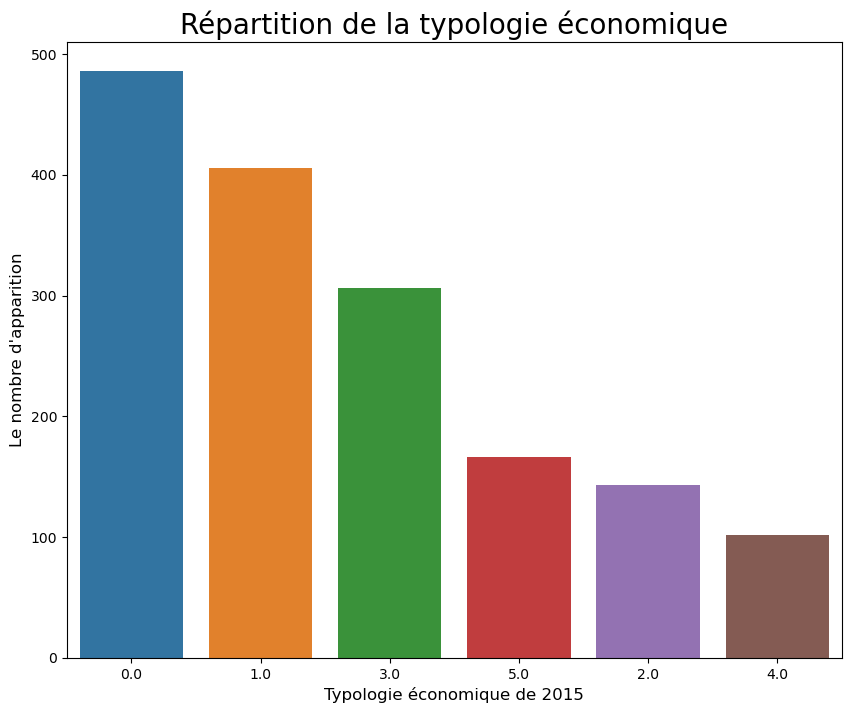

In [24]:
# Prendre l'ordre de la typlogie économique
eco_order = X["Economic_typology_2015"].value_counts().index
# Définir l'espace de travail
fig(10, 8)
# Tracer le graphique en diagramme
plot_bar(X, "Economic_typology_2015", order=eco_order)
# Décrire le graphique
describe_graph("Répartition de la typologie économique",
               "Typologie économique de 2015", 
               "Le nombre d'apparition"
               );

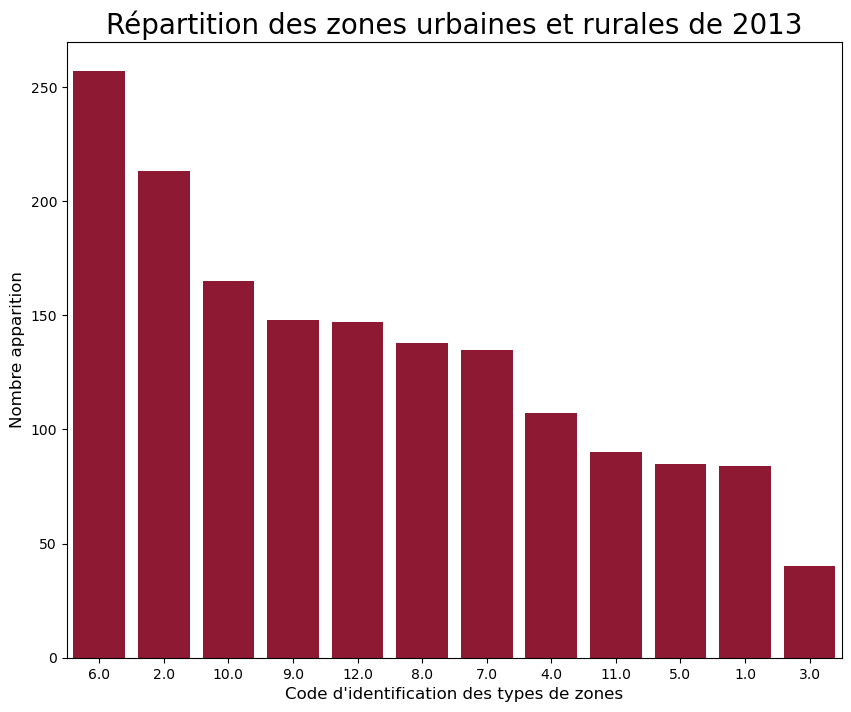

In [25]:
# Prendre l'ordre d'identification des zones urbaines et rurales
eco_order = X["Urban_Inf_Code_2013"].value_counts().index
COLOR_BASE = "#A10627"
# Définir l'espace de travail
fig(10, 8)
# Appeller la fonction qui trace le diagramme à barres
plot_bar(X, "Urban_Inf_Code_2013", order=eco_order, color=COLOR_BASE)
# Décrire le graphique
describe_graph("Répartition des zones urbaines et rurales de 2013",
               "Code d'identification des types de zones", 
               "Nombre apparition");

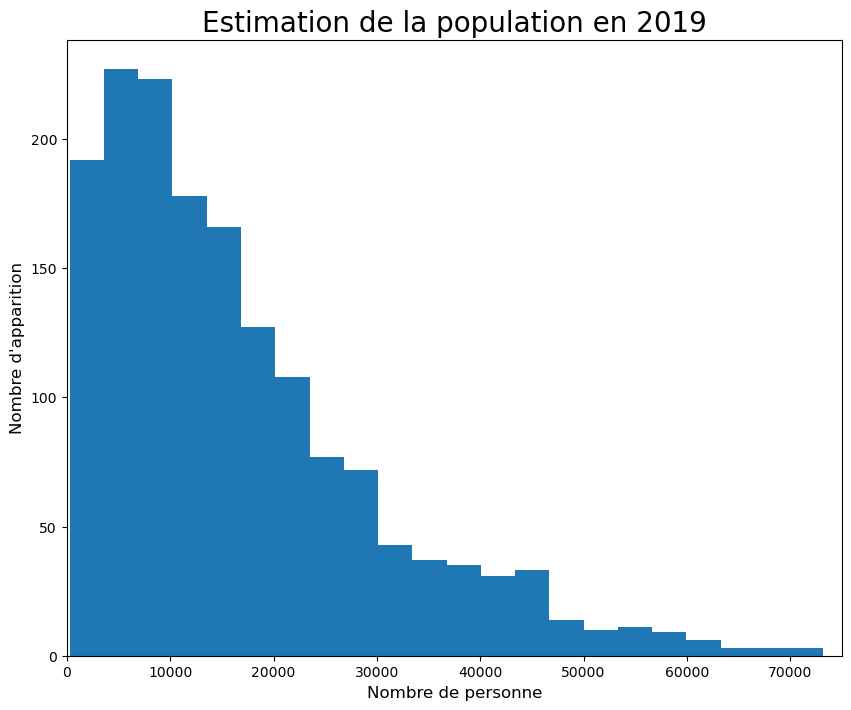

In [26]:
# Définir l'espace de travail
fig(10, 8)
# Visualiser l'estimation de population en 2019
plot_hist(X, "POP_ESTIMATE_2019", bins=25)
# Décrire le graphique
describe_graph("Estimation de la population en 2019", 
               "Nombre de personne",
               "Nombre d'apparition")
# Limiter les valeurs de l'axe x
plt.xlim([0, 75000]);

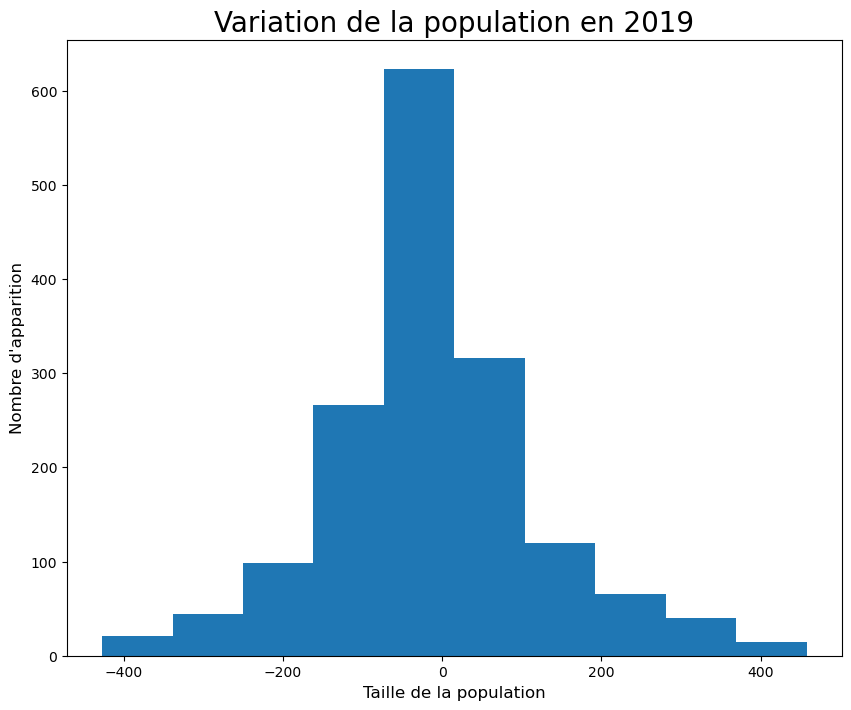

In [27]:
# Définir l'espace de travail
fig(10, 8)
# Visualiser la variation de la population en 2019 
plot_hist(X, "N_POP_CHG_2019")
# Décrire le graphique
describe_graph("Variation de la population en 2019", 
               "Taille de la population",
               "Nombre d'apparition");

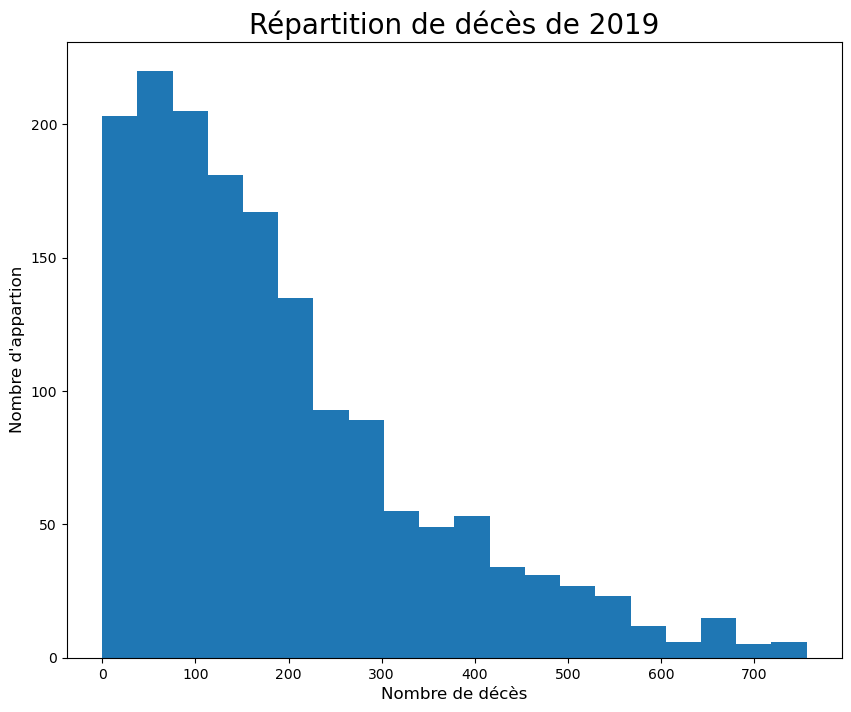

In [28]:
# Définir l'espace de travail
plt.figure(figsize=(10, 8))
# Visualiser le nombre de personnes decedées en 2019
plot_hist(X, "Deaths_2019", bins=20)
# Décrire le graphique
describe_graph("Répartition de décès de 2019",
               "Nombre de décès",
               "Nombre d'appartion");

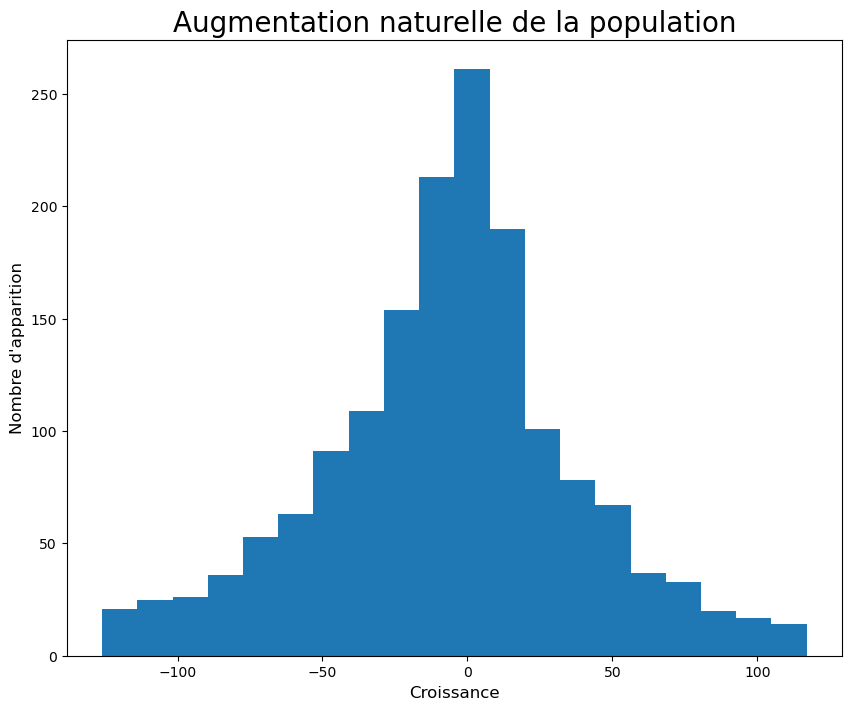

In [29]:
# Définir l'espace de travail
fig(10, 8)
# Visualiser l'augmentation naturelle de la population en 2019
plot_hist(X, "NATURAL_INC_2019", bins=20)
# Décrire le graphique
describe_graph("Augmentation naturelle de la population", 
               "Croissance",
               "Nombre d'apparition");

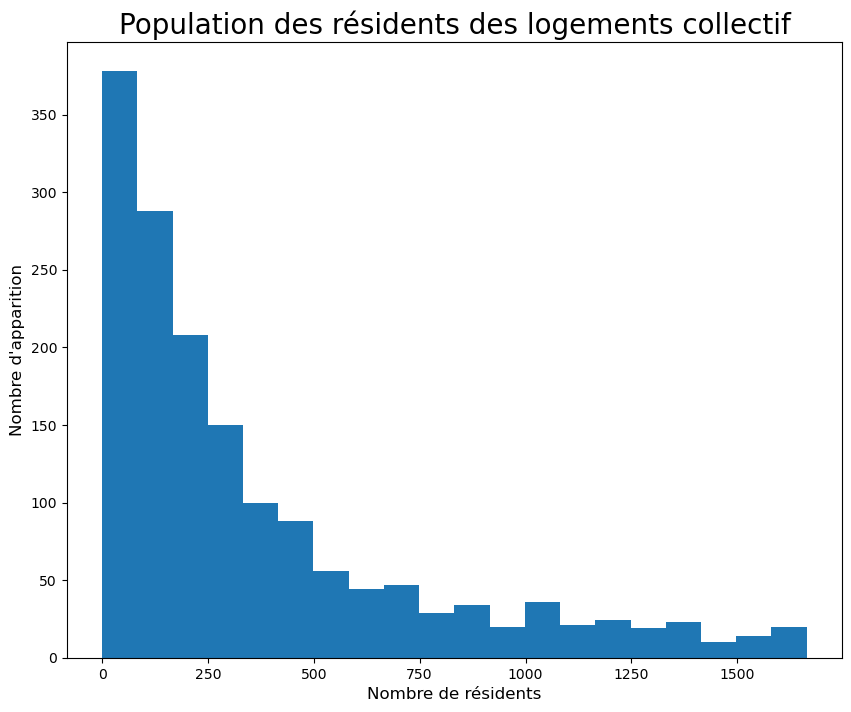

In [30]:
# Définir l'espace de travail
plt.figure(figsize=(10, 8))
# Visualiser le nombre de résidents de logements collectifs
plot_hist(X, "GQ_ESTIMATES_2019", bins=20)
# Décrire le graphique
describe_graph("Population des résidents des logements collectif",
               "Nombre de résidents",
               "Nombre d'apparition");

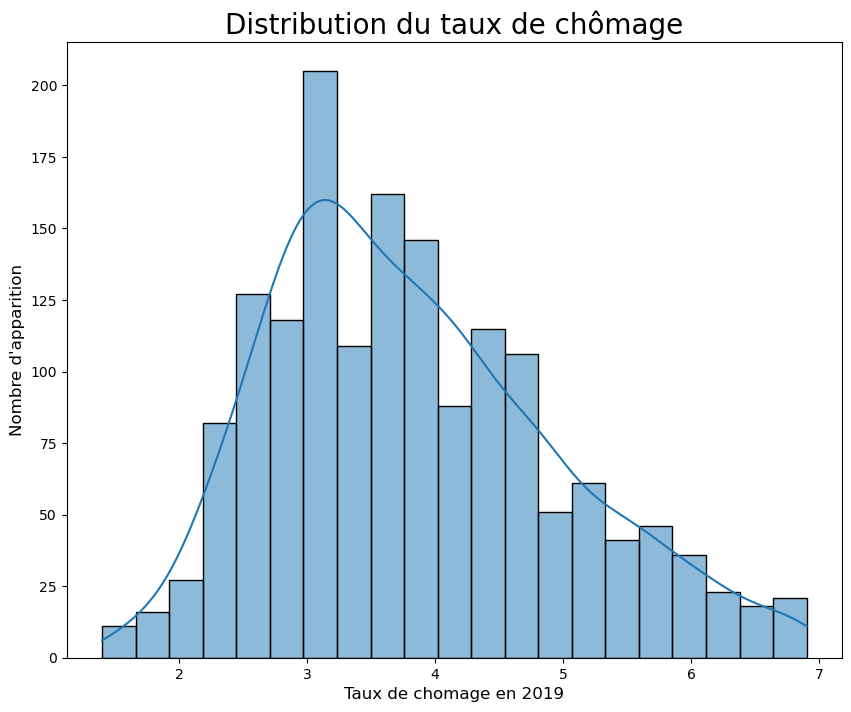

In [31]:
# Définir l'espace de travail
plt.figure(figsize=(10, 8))
# Visualiser le taux de chômage de 2019 en appellant
# la fontion qui trace les distributions
plot_distribution(X, "Unemployment_rate_2019")
# Décrire le graphique
describe_graph("Distribution du taux de chômage",
               "Taux de chomage en 2019",
               "Nombre d'apparition");

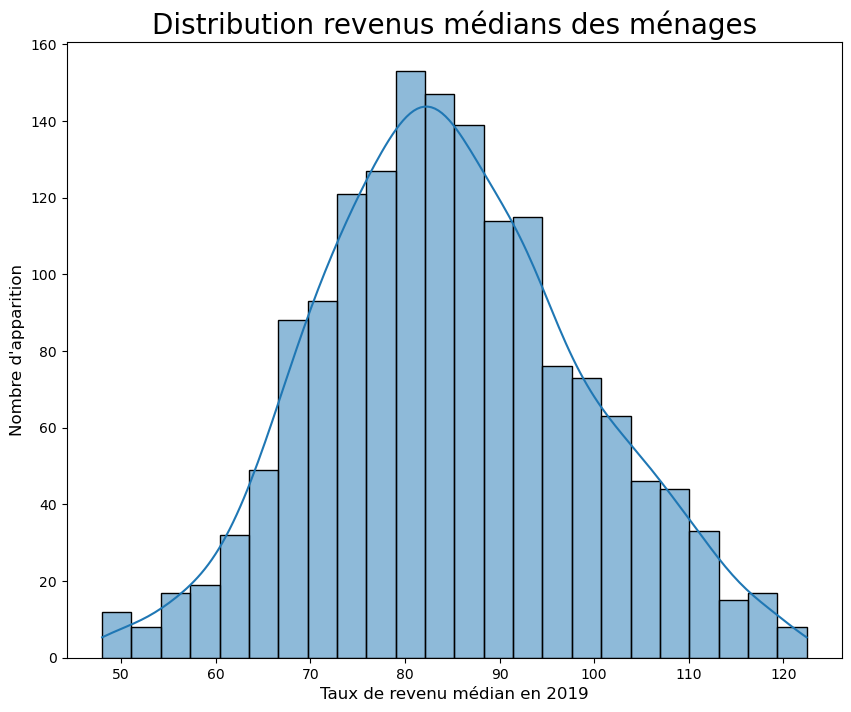

In [32]:
# Définir l'espace de travail
plt.figure(figsize=(10, 8))
# Visualiser le taux du revenu médian des ménages de 2019 en appellant
# la fontion qui trace les distributions
plot_distribution(X, "Med_HH_Income_Percent_of_State_Total_2019")
# Décrire le graphique
describe_graph("Distribution revenus médians des ménages",
               "Taux de revenu médian en 2019",
               "Nombre d'apparition");

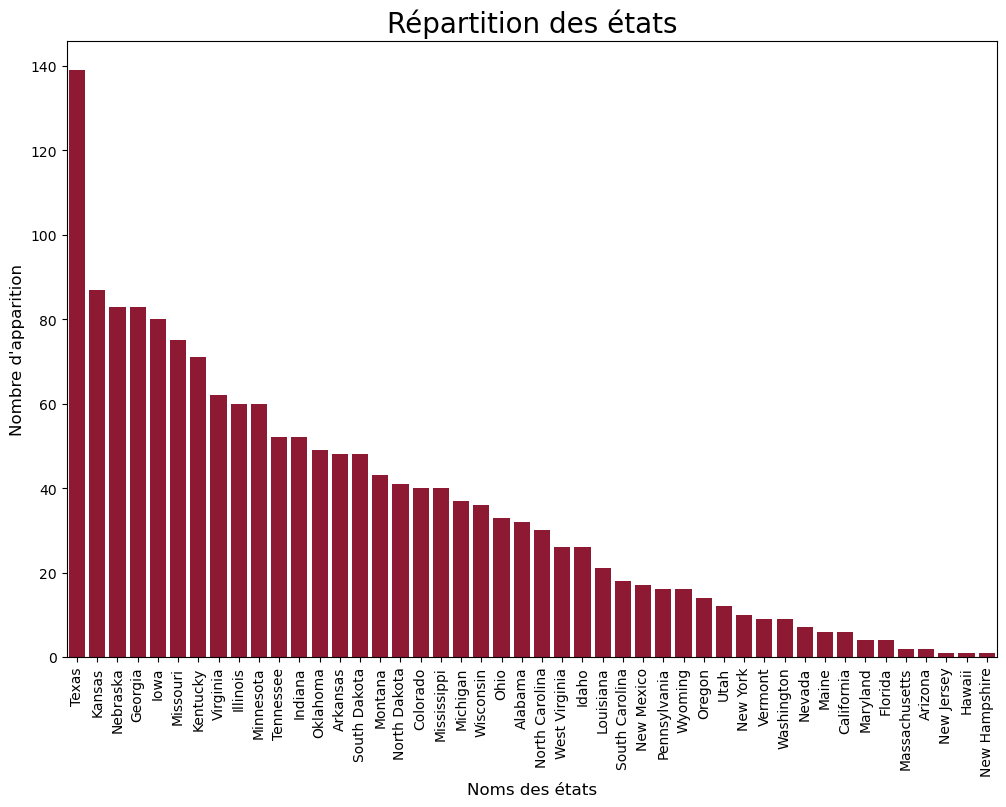

In [33]:
# Prendre l'ordre d'identification des zones urbaines et rurales
state_order = X["state_name"].value_counts().index
# Définir la couleur de base
BASE_COLOR = "#A10627"
# Définir l'espace de travail
fig(12, 8)
# Appeller la fonction qui trace le diagramme à barres
plot_bar(X, "state_name", order=state_order, color=BASE_COLOR)
# Décrire le graphique
describe_graph("Répartition des états", 
               "Noms des états",
               "Nombre d'apparition")
# Roter les valeurs de l'axe x
plt.xticks(rotation=90);

<a id="a4"></a>
## 4.2 Analyse Bivariée

Il s'agit de visualiser graphiquement la relation entre deux variables, notamment la variable `explicative` qu'elle soit `numérique` ou `catégorielle` et la variable cible dite `target`.


<a id="num_target"></a>
## 4.2.1 Relation entre les variables numériques et la variable cible (*`target`*)

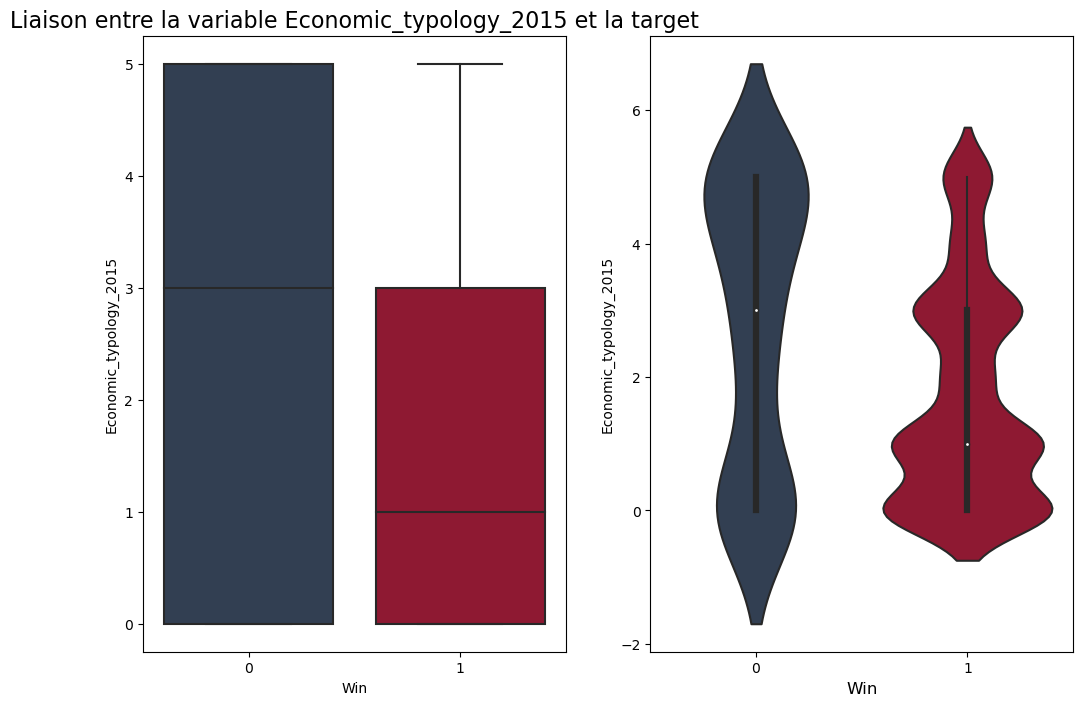

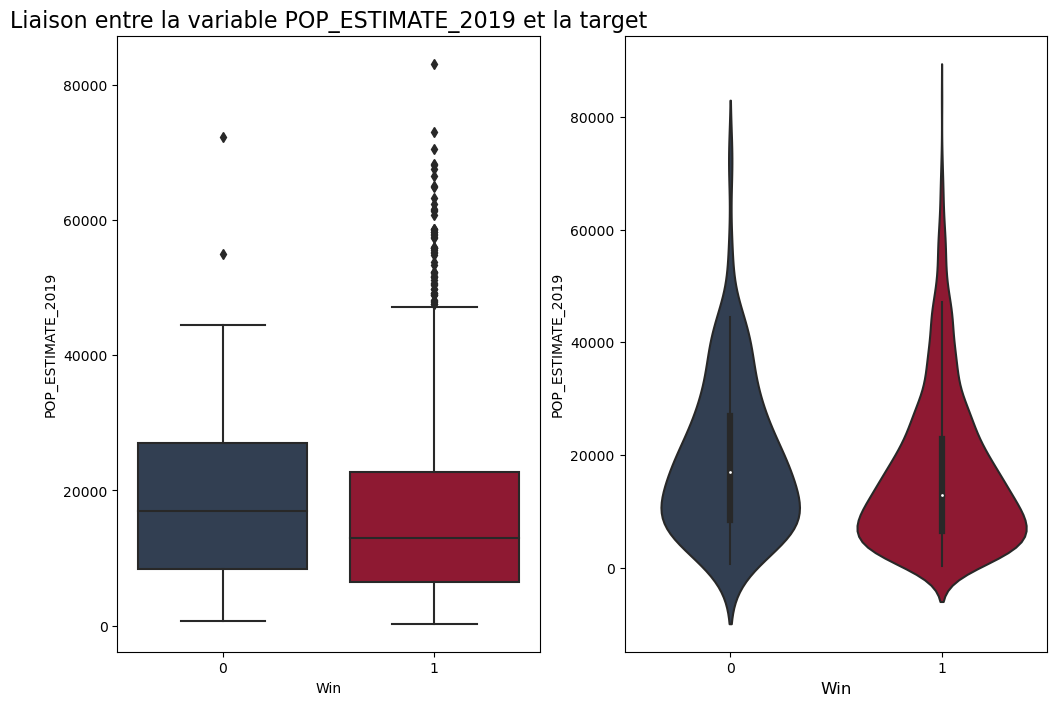

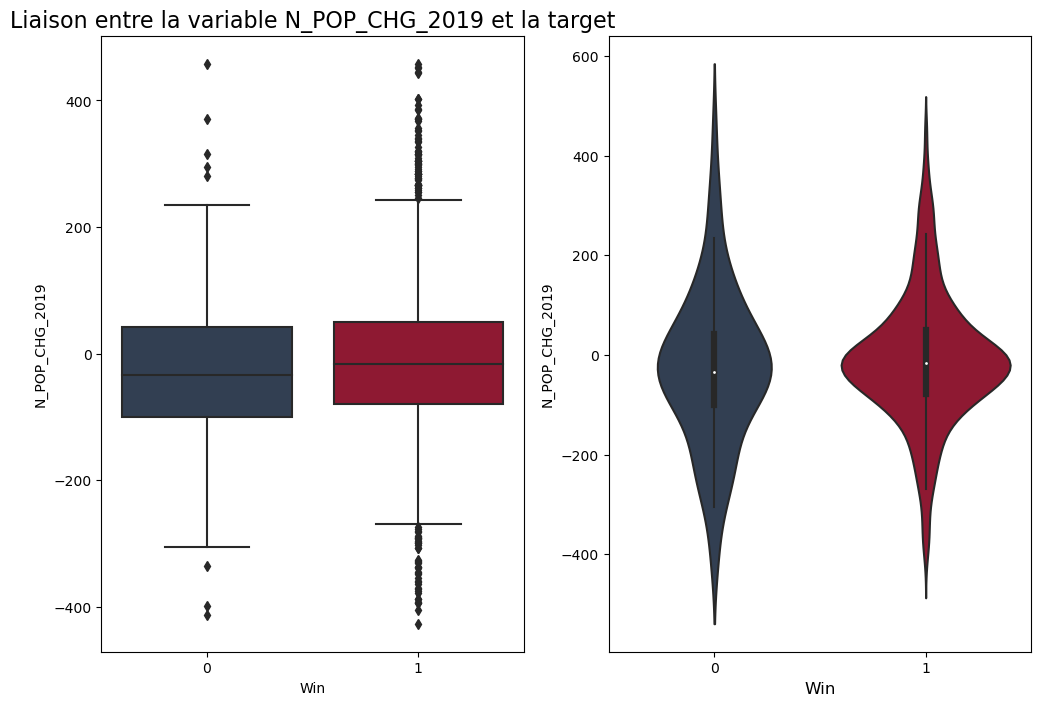

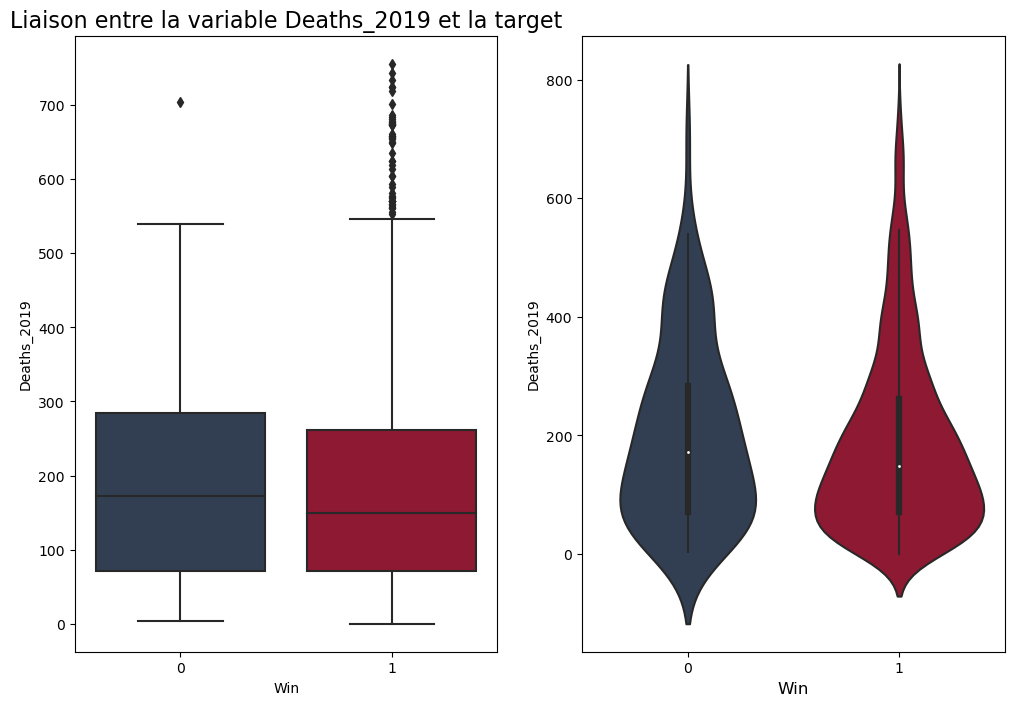

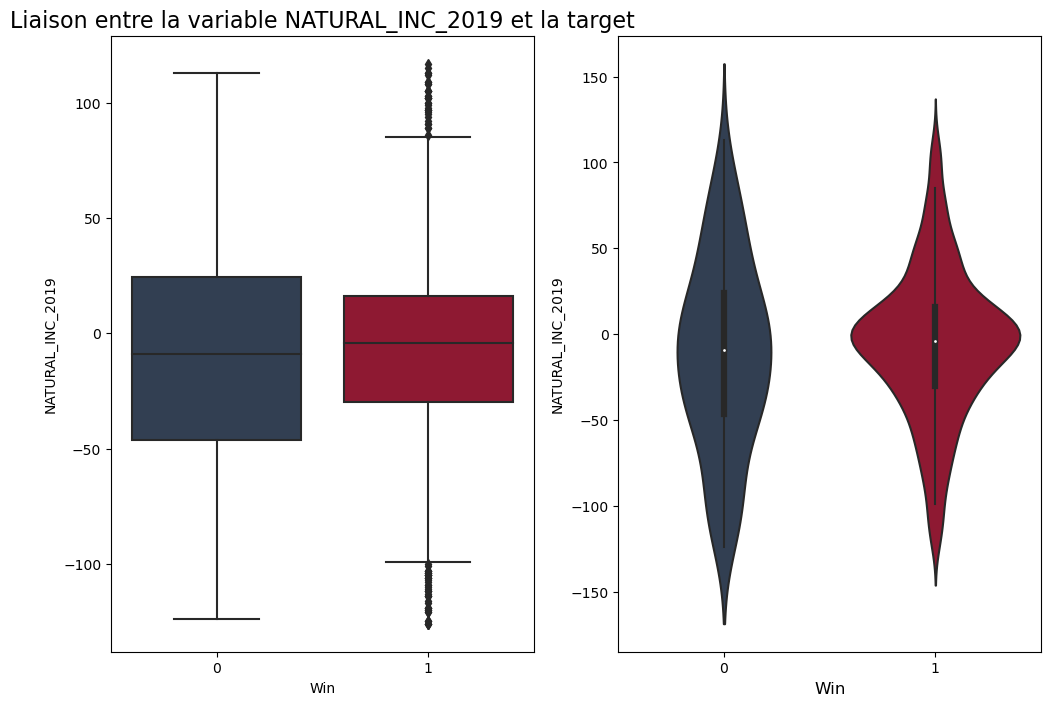

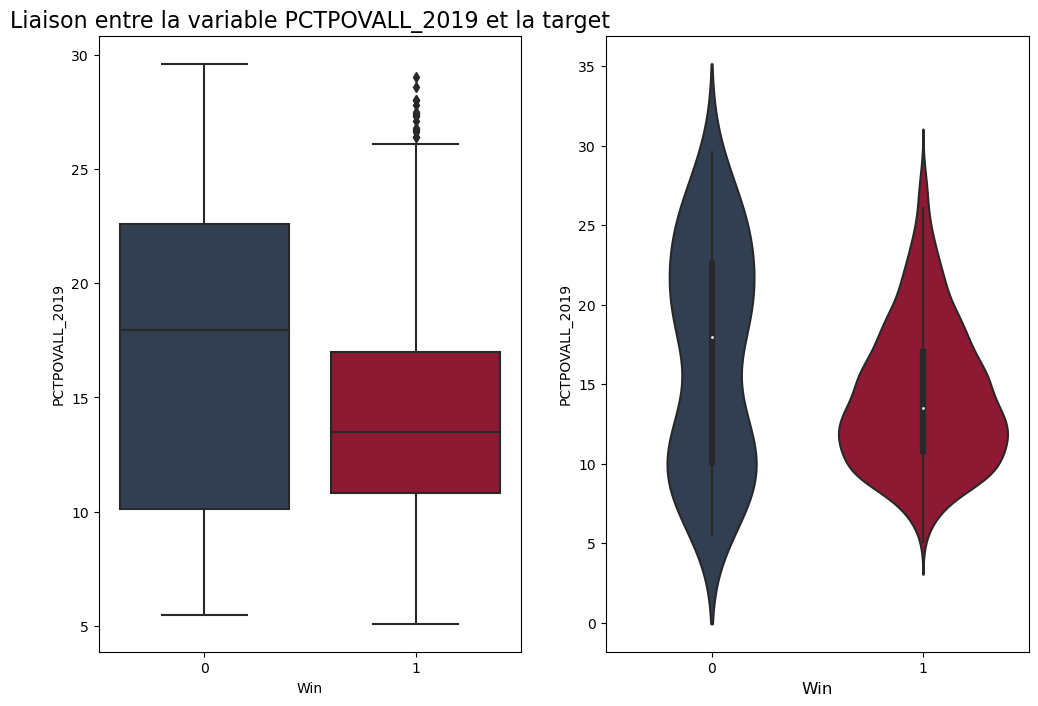

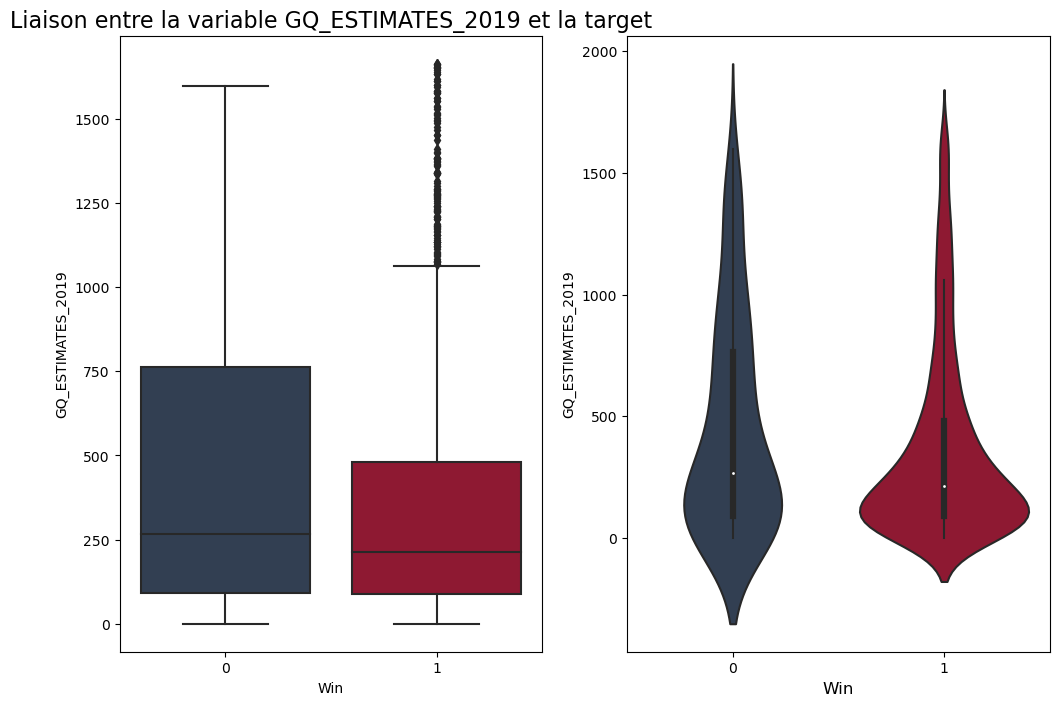

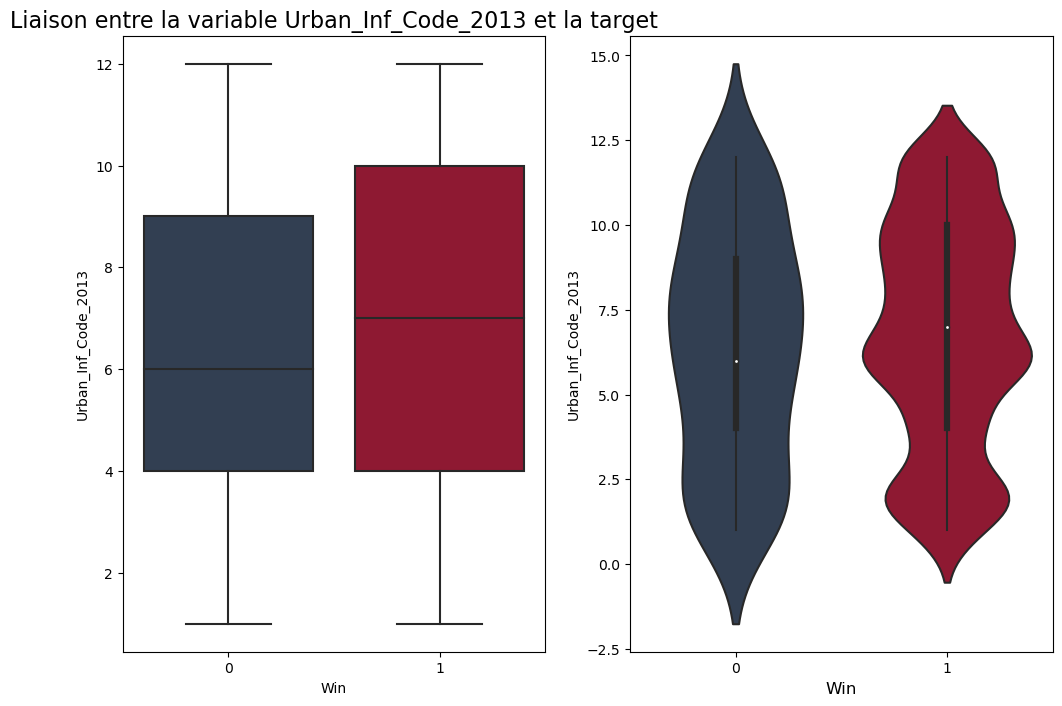

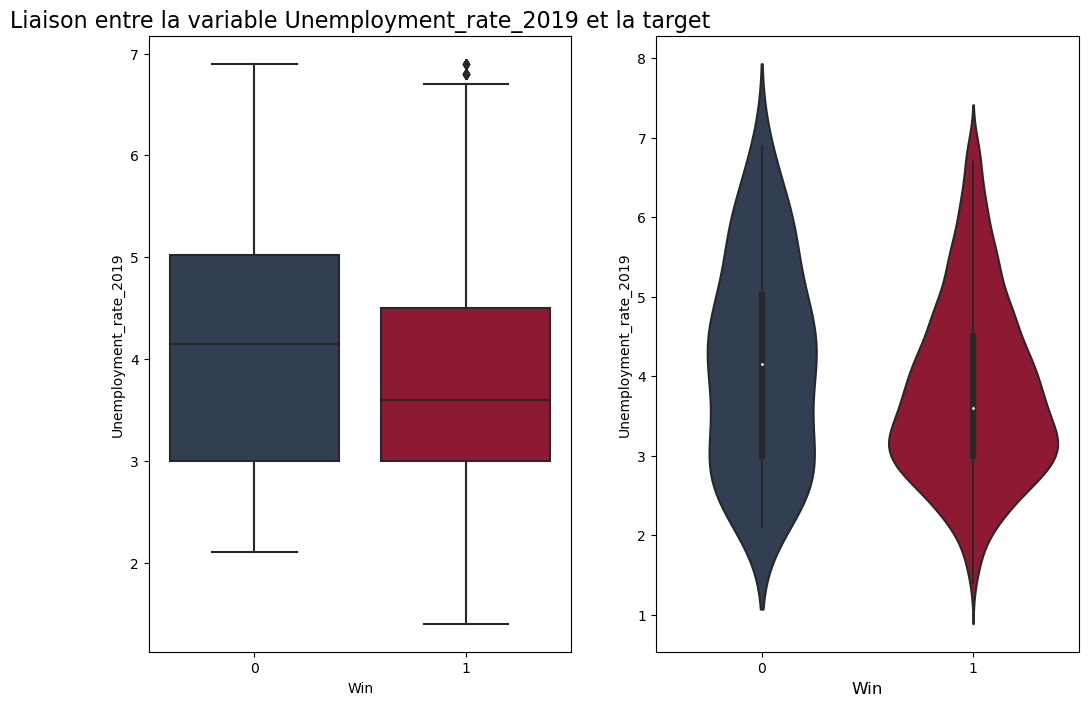

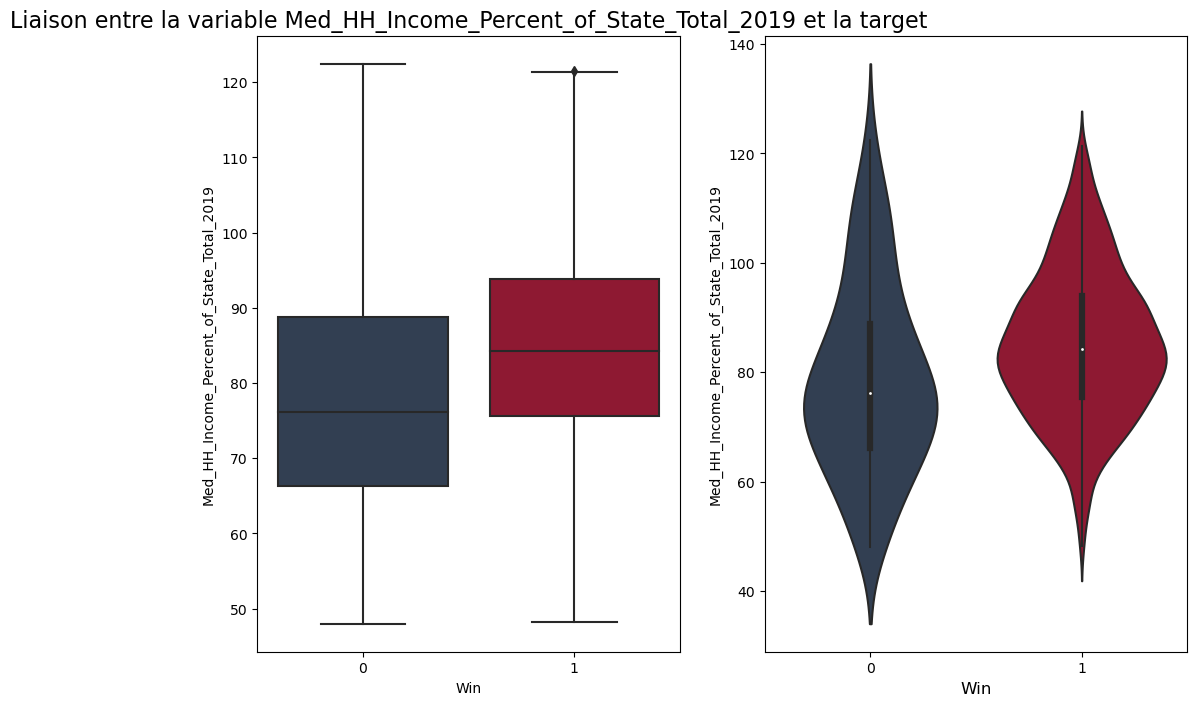

In [34]:
# Représenter graphiquement les varibales numériques avec la target
for col in num_cols:
    fig, ax = plt.subplots(1, 2, figsize=(12, 8))
    # Boxplot entre la target et la variable explicative col
    sns.boxplot(x=y, y=X[col],
                ax=ax[0], palette=["#2D3E57", "#A10627"])
    ax[0].set_xlabel('Win')
    ax[0].set_title("Liaison entre la variable " +
                    col + " et la target", fontsize=16)

    # Pour le violinplot entre la target et la variable explicative col
    sns.violinplot(x=y, y=X[col],
                   ax=ax[1], palette=["#2D3E57", "#A10627"])
    ax[1].set_xlabel("Win", fontsize=12)

<a id="vars"></a>
## 4.2.2 Relation entre les variables explicatives

Dans cette section il s'agit de voir comment les variables explicatives sont *`liées`* entre elles. En effet, les `interdépendances` ou les `corrélations` entre les différentes variables explicatives impactent les modèles.

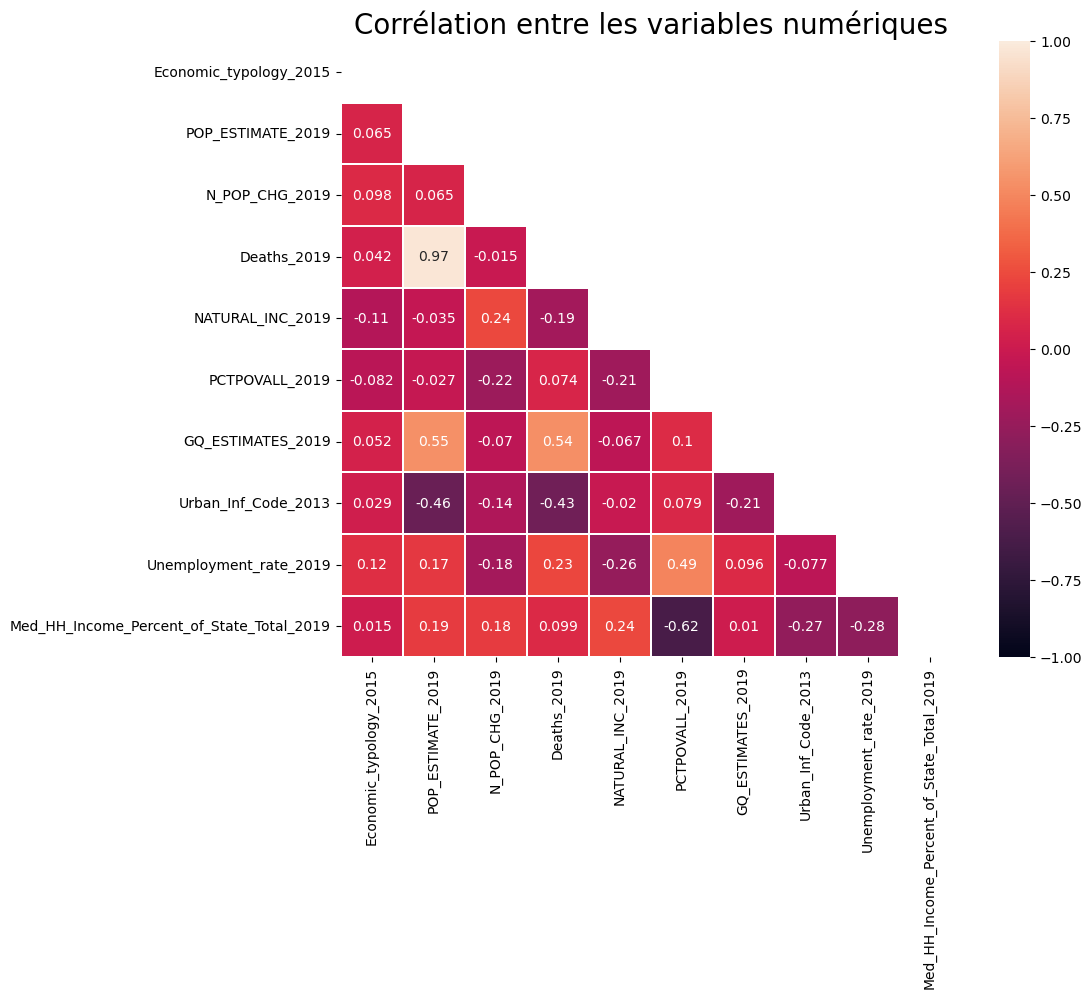

In [35]:
# Calculer la matrice de corrélation sur le jeu de train
person_matrix = X.corr()

# Filtrer sur la matrice triangulaire inférieure
mask = np.triu(np.ones_like(person_matrix))

# Visualiser la matrice de corrélation
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(person_matrix, vmin=-1, vmax=1, mask=mask,
            annot=True, linewidths=.2, ax=ax)
# Titrer la figure
plt.title("Corrélation entre les variables numériques", fontsize=20);

- **Définition de la fonction de visualisation des relations**

In [36]:
# Définir la fonction qui montre la relation entre deux variables
def var_relationship(df, x_col, y_col, facet):

    # Visualiser la relation
    sns.lmplot(data=df, x=x_col, y=y_col, 
               hue=facet, fit_reg=False)

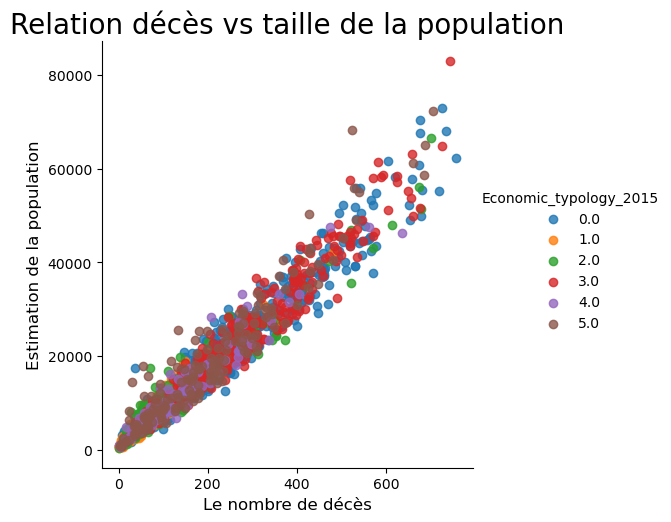

In [37]:
# Afficher la relation entre les décès et l'estimation de la population
var_relationship(X, "Deaths_2019", 
                 "POP_ESTIMATE_2019",
                 "Economic_typology_2015")
# Décrire le graphique
describe_graph("Relation décès vs taille de la population",
               "Le nombre de décès",
               "Estimation de la population");

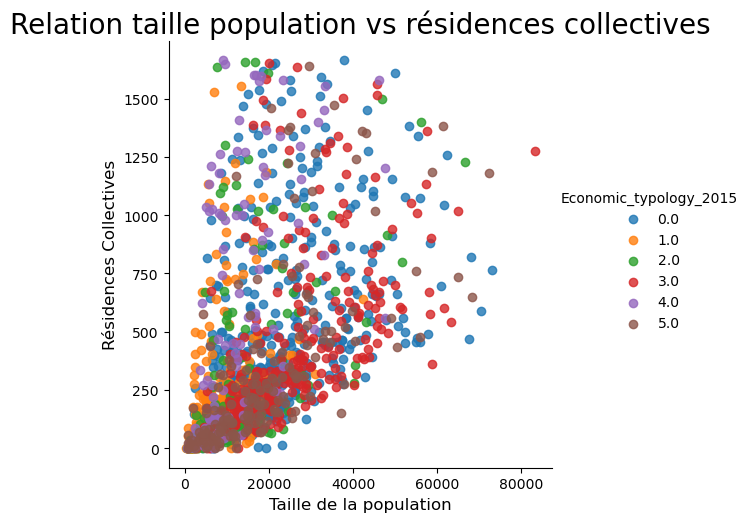

In [38]:
var_relationship(X, "POP_ESTIMATE_2019", 
                 "GQ_ESTIMATES_2019",
                 "Economic_typology_2015")
# Décrire le graphique
describe_graph("Relation taille population vs résidences collectives",
               "Taille de la population",
               "Résidences Collectives");

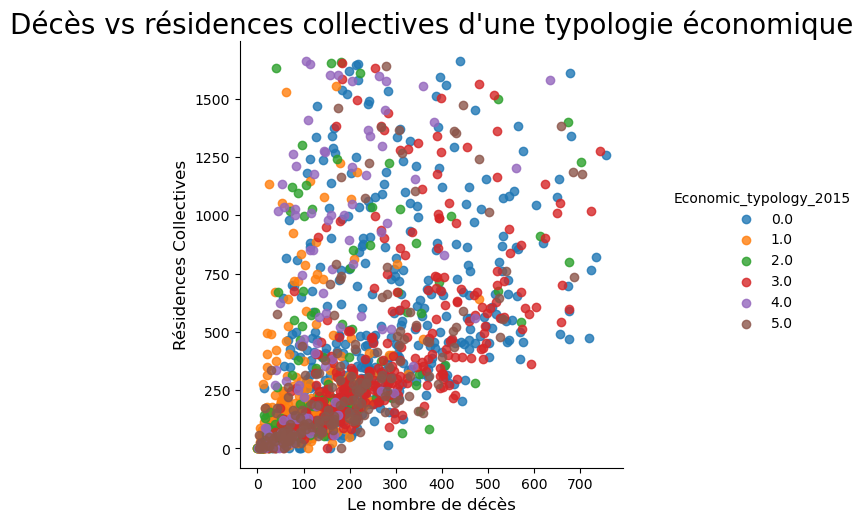

In [39]:
# Visualiser la relation entre le nombre de décès qu'il y a 
# dans des résidences collectives
var_relationship(X, "Deaths_2019",
                 "GQ_ESTIMATES_2019",
                 "Economic_typology_2015")
# Décrire le graphique
describe_graph("Décès vs résidences collectives d'une typologie économique",
               "Le nombre de décès",
               "Résidences Collectives");

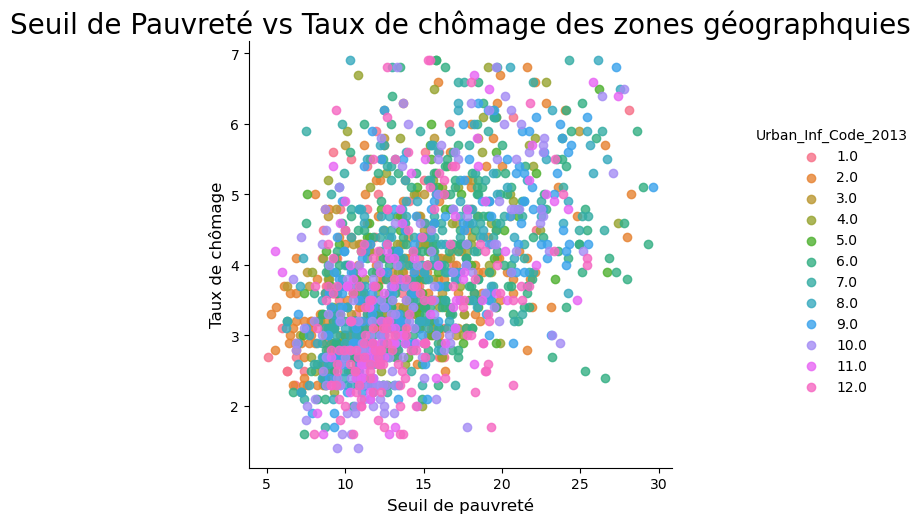

In [40]:
# Relation entre le seuil de pauvreté et le taux de chômage
var_relationship(X, "PCTPOVALL_2019",
                 "Unemployment_rate_2019",
                 "Urban_Inf_Code_2013")
# Décrire le graphique
describe_graph("Seuil de Pauvreté vs Taux de chômage des zones géographquies",
               "Seuil de pauvreté",
               "Taux de chômage");

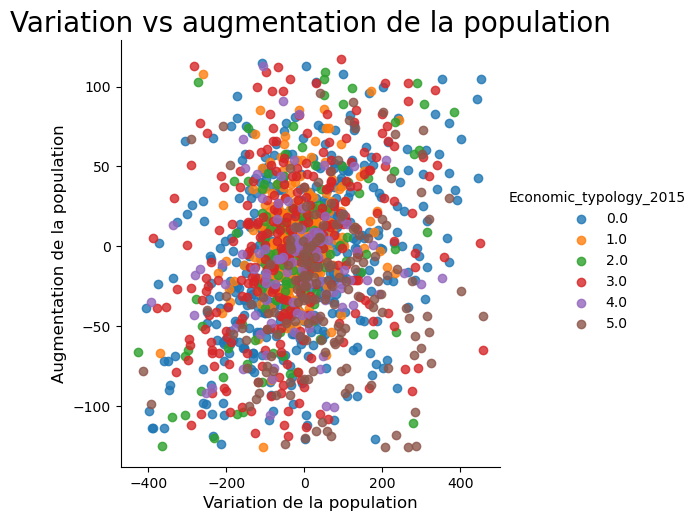

In [41]:
# Relation entre la variation et l'augmentation de la population
var_relationship(X, "N_POP_CHG_2019",
                 "NATURAL_INC_2019",
                 "Economic_typology_2015")
# Décrire le graphique
describe_graph("Variation vs augmentation de la population",
               "Variation de la population",
               "Augmentation de la population");

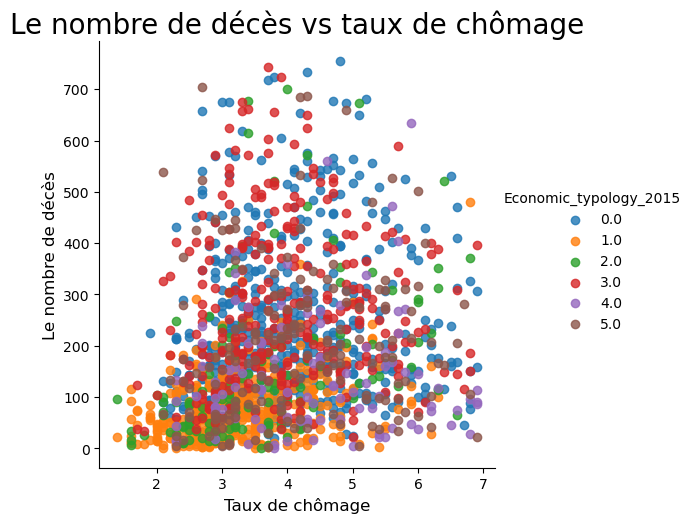

In [42]:
# Relation entre le nomnbre de décès et le taux de chômage d'une typologie économque
var_relationship(X, "Unemployment_rate_2019",
                 "Deaths_2019",
                 "Economic_typology_2015")
# Décrire le graphique
describe_graph("Le nombre de décès vs taux de chômage",
               "Taux de chômage",
               "Le nombre de décès");

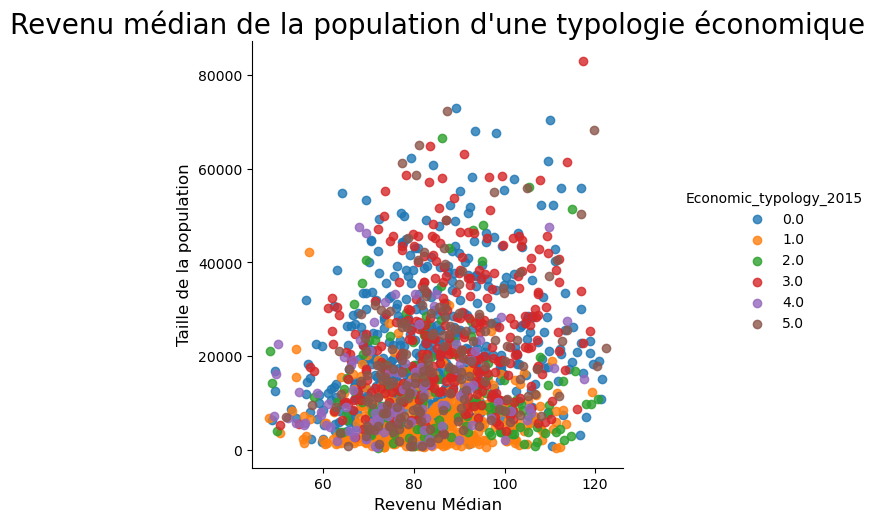

In [43]:
# Relation entre le revenu médian et la taille de la population 
# des typologies économiques
var_relationship(X, "Med_HH_Income_Percent_of_State_Total_2019",
                 "POP_ESTIMATE_2019",
                 "Economic_typology_2015")
# Décrire le graphique
describe_graph("Revenu médian de la population d'une typologie économique",
               "Revenu Médian",
               "Taille de la population");

<a id="end"></a>
## 5. Conclusion

>En conclusion, nous avions eu un grand ensemble de données dont nous avons pu sélectionner un certain nombre de variables jugées pertinentes du point de vue métier. Il resort que cette analyse nous a permi de voir les incohérences qu'il y avait dans nos données, nous avons supprimer toutes les valeurs manquantes qui, d'ailleurs n'étaient qu'une goutte d'eau dans l'ocean, car elles n'étaient pas nombreuses.
>
>Nous avons idendifier des valeurs aberrantes (`outliers`) potentielles dont un grand nombre dans nos données numériques et les avons supprimier car, elles constituaientt un grand frein pour le reste de l'analyse car, nous l'avons remarqué l'impacte qu'elles avaient sur les statistiques classiques.
>
>L'`analyse univariée` a révelé que les zones dites **urbaines** avaient une économie fortement diversifiée contrairement aux zones **rurales**, l'état de **Texas** est largement en tête en nombre d'électeurs.
>
>Quant à l'`analyse` bivariée, elle était en riche en information. En effet, les corrélations qu'il y avait entre les différentes variables, notamment entre le **nombre de décès** et **l'estimation de la population** était assez forte car, cela a permi d'observer qu'il y avait un très petit nombre de **décès** dans les **zones urbaines** fortement **diversifiée**. **
>
>>>Pour finir, ces analyses sont une grandre aide dans la prochaine étape qui la est **`modélisation`** car, elles nous ont donné des pistes sur des `variables` assez **pertinentes.**
